<a href="https://colab.research.google.com/github/ripunjaysingh88/ML_Model_from_Scratch/blob/main/Neural_Network_FF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/grive/')

Mounted at /content/grive/


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py


#Data : Coursera programming assignment
- a training set of m_train images labelled as cat (1) or non-cat (0)
- a test set of m_test images labelled as cat and non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB)

In [18]:
#load train data
train_dataset = h5py.File('/content/grive/MyDrive/ML_model_scratch/FF_NN/train_catvnoncat.h5', "r")
train_x_original = np.array(train_dataset["train_set_x"][:])
y_train = np.array(train_dataset["train_set_y"][:])

In [19]:
train_x_original.shape


(209, 64, 64, 3)

In [20]:
y_train.shape


(209,)

In [21]:
#load test data
test_dataset = h5py.File('/content/grive/MyDrive/ML_model_scratch/FF_NN/test_catvnoncat.h5', "r")
test_x_original = np.array(test_dataset["test_set_x"][:]) 
y_test = np.array(test_dataset["test_set_y"][:])

In [22]:
test_x_original.shape

(50, 64, 64, 3)

In [23]:
y_test.shape

(50,)

In [24]:
# non-cat_label = 0 , cat_label = 1
classes = np.array(test_dataset["list_classes"][:])
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [25]:
#reshape 1D train_y to 2D.
y_train = y_train.reshape(1, y_train.shape[0])
y_train.shape

(1, 209)

In [26]:
#reshape 1D test_y to 2D.
y_test = y_test.reshape(1, y_test.shape[0])
y_test.shape

(1, 50)

In [27]:
#flatten the train_x_orginal and reshape to (#no of features, #no of samples)
train_x_original = train_x_original.reshape(train_x_original.shape[0], -1).T
train_x_original.shape

(12288, 209)

In [28]:
#flatten the test_x_orginal and reshape to (#no of features, #no of samples)
test_x_original = test_x_original.reshape(test_x_original.shape[0], -1).T
test_x_original.shape

(12288, 50)

In [29]:
#normalization so that pixel value in range between 0 and 1.
X_train = train_x_original/255
X_train.shape

(12288, 209)

In [30]:
#normalization so that pixel value in range between 0 and 1.
X_test = test_x_original/255
X_test.shape

(12288, 50)

#2-layer neural network

1. Initialize parameters
2. Loop for num_iterations (Gradient Descent):

    a. Forward propagation

    b. Compute cost function

    c. Backward propagation
    
    d. Update parameters 
3. Use trained parameters to predict labels

In [31]:
#constant parameters 
n_x = 12288 # input X
n_h = 7 # layer_1 hidden units
n_y = 1 # output layer unit
layer_dim = (n_x, n_h, n_y)

In [107]:
class Neural_Network:
  def __init__(self, learning_rate, num_iterations):
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations

  def initialize_parameters(self, n_x, n_h, n_y):
    network_parameters = {}
    #random number generated from standard gaussian with mean 0 and standard deviation 0.01
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    #he assert statement is used to continue the execute below code if the given condition evaluates to True. If False then raise error.
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    network_parameters = {'W1':W1,
                          'b1':b1,
                          'W2':W2,
                          'b2':b2}
    return network_parameters


  def forward_propogation(self, A_prev, W, b, activation_fun):
    if activation_fun == 'relu':
      #linear combination of weights and features
      Z = np.dot(W, A_prev) + b
      # check the shape of Z before executing below codes
      assert (Z.shape == (W.shape[0], A_prev.shape[1]))
      #present layer activation output -relu
      activation = np.maximum(0,Z)
    
    elif activation_fun == 'sigmoid':
      #linear
      Z = np.dot(W, A_prev) + b
      # check the shape of Z 
      assert (Z.shape == (W.shape[0], A_prev.shape[1]))
      #present layer activation output -sifmoid
      activation = 1/(1+ np.exp(-Z))

    #caching for backpropogation step
    linear_cache = (A_prev, W, b)
    activation_cache = Z

    cache = (linear_cache, activation_cache)
    return activation , cache

  def compute_training_loss(self, A2, Y):
    m = Y.shape[0]
    #loss value for whole training set i.e '1/m' used.
    loss_value = -1/m * (np.dot(Y, np.log(A2).T) + np.dot(1-Y, np.log(1-A2).T))

    #remove all the dimension and gives just scalar value i.e [[88]] is given as 88. 
    loss_value = np.squeeze(loss_value)

    assert (loss_value.shape == ())
    return loss_value


  def backward_propogation(self, dA, cache, activation_fun):

    linear_cache , activation_cache = cache
    
    if activation_fun == 'sigmoid':
      #compute dZ to calculate dW and db.
      Z = activation_cache
      s = 1/(1 + np.exp(-Z)) 
      dZ = dA*s*(1-s)
      assert (dZ.shape == Z.shape)
      #compute dW,dB and dA_prev
      A_prev , W , b = linear_cache
      m = A_prev.shape[1] # number of training samples.
      dW = 1/m * np.dot(dZ, A_prev.T)
      db = 1/m * np.sum(dZ, axis =1, keepdims=True)
      dA_prev = np.dot(W.T, dZ)  #A_prev is what we cached, in backpropogation gives output one of which is dA_prev.
      assert (dW.shape == W.shape)
      assert (db.shape == b.shape)
      assert (dA_prev.shape == A_prev.shape)

    elif activation_fun == 'relu':
      #compute dZ
      Z = activation_cache
      #relu derivative is 1 if Z >0 else it's 0. First assume all the values of Z are postive and calculate dZ then replace 
      #all the values of dZ where  Z was less than 0.
      dZ = np.copy(dA) # since derivative is 1.
      #set all the values to 0 where Z<=0.
      dZ[Z<=0] = 0
      assert (dZ.shape == Z.shape)
      #compute dW,dB and dA_prev
      A_prev , W , b = linear_cache
      m = A_prev.shape[1] # number of training samples.
      dW = 1/m * np.dot(dZ, A_prev.T)
      db = 1/m * np.sum(dZ, axis =1, keepdims=True)
      dA_prev = np.dot(W.T, dZ)  #A_prev is what we cached, in backpropogation gives output one of which is dA_prev.
      assert (dW.shape == W.shape)
      assert (db.shape == b.shape)
      assert (dA_prev.shape == A_prev.shape)

    return dA_prev, dW, db

  def update_parameters(self, network_parameters, gradient, learning_rate):
    network_parameters_updated = {}

    W1 = network_parameters['W1']
    b1 = network_parameters['b1']
    W2 = network_parameters['W2']
    b2 = network_parameters['b2']

    dW1 = gradient['dW1'] 
    db1 = gradient['db1']  
    dW2 = gradient['dW2']  
    db2 = gradient['db2'] 

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    network_parameters_updated = {'W1': W1,
                                  'b1': b1,
                                  'W2': W2,
                                  'b2': b2}

    return network_parameters_updated


  def fit(self, X, Y, layer_dim):
    gradient = {}
    training_loss = []
    n_x, n_h, n_y = layer_dim
    
    #parameter intialization
    network_parameters = self.initialize_parameters(n_x, n_h, n_y) # returns dictionary
    W1 = network_parameters['W1']
    b1 = network_parameters['b1']
    W2 = network_parameters['W2']
    b2 = network_parameters['b2']

    #gradient descent
    for i in range(self.num_iterations):
       #forward propogation
       A1, cache1 = self.forward_propogation(X, W1, b1, activation_fun = 'relu')
       A2, cache2 = self.forward_propogation(A1, W2, b2, activation_fun = 'sigmoid')

       #calculate loss for whole training set once forward propogation of all layer is over.
       loss_value = self.compute_training_loss(A2, Y)
       if i%100 == 0 :
          training_loss.append(loss_value)
          print("Training loss after {} iteration : {}".format(i, np.squeeze(loss_value)))
      
       #backward propogation
       dA2 = -(np.divide(Y, A2) - np.divide(1-Y, 1-A2))
       dA1, dW2, db2 = self.backward_propogation(dA2, cache2, activation_fun = 'sigmoid')#passing activation because it need to calculate dZ for dW and db calculation.
       dA0, dW1, db1 = self.backward_propogation(dA1, cache1, activation_fun = 'relu') #passing activation because it need to calculate dZ for dW and db calculation.
            #store gradient in dictionary to update parameters, after each iteration new values are stored in respective key's.
       gradient['dW1'] = dW1
       gradient['db1'] = db1
       gradient['dW2'] = dW2
       gradient['db2'] = db2

       #update the parameters, return value of update_parameters() has to be stored in same variable 'network_parameteres' as we are calling this variable
       # recursively in update_parameters().
       network_parameters = self.update_parameters(network_parameters, gradient, self.learning_rate) #returns dictionary
            #reset the parameters for next iteration
       W1 = network_parameters['W1']
       b1 = network_parameters['b1']
       W2 = network_parameters['W2']
       b2 = network_parameters['b2']


    #plot the training loss vs number of iteration(per hundreds)
    plt.figure(figsize=(8,8))
    plt.plot(training_loss, label = 'Training_loss')
    plt.legend(loc = 'upper right')
    plt.ylabel('Loss')
    plt.xlabel('Iteration (per hundreds')      

    return network_parameters

  def predict(self, X_test, Y_test, trained_network_parameters):
    W1 = trained_network_parameters['W1']
    b1 = trained_network_parameters['b1']
    W2 = trained_network_parameters['W2']
    b2 = trained_network_parameters['b2']
    m  = X_test.shape[1]

    A1, cache1 = self.forward_propogation(X_test, W1, b1, activation_fun = 'relu')
    A2, cache2 = self.forward_propogation(A1, W2, b2, activation_fun = 'sigmoid')

    Y_pred = np.where(A2>0.5, 1, 0)
    print("Accuracy : {}".format((np.sum(Y_pred == Y_test))/m))


Training loss after 0 iteration : 144.42317017401328
Training loss after 100 iteration : 134.95017216266592
Training loss after 200 iteration : 131.67635667494434
Training loss after 300 iteration : 124.58129853971107
Training loss after 400 iteration : 114.92553968834211
Training loss after 500 iteration : 103.34349268499763
Training loss after 600 iteration : 90.26300349863519
Training loss after 700 iteration : 78.99022409741926
Training loss after 800 iteration : 78.8315343786773
Training loss after 900 iteration : 73.99368644172615
Training loss after 1000 iteration : 67.96460718126089
Training loss after 1100 iteration : 61.71075729883958
Training loss after 1200 iteration : 54.941432305272684
Training loss after 1300 iteration : 37.18072479821775
Training loss after 1400 iteration : 28.09921493183179
Training loss after 1500 iteration : 46.30895152864121
Training loss after 1600 iteration : 20.001679748016187
Training loss after 1700 iteration : 18.0279073949027
Training loss af

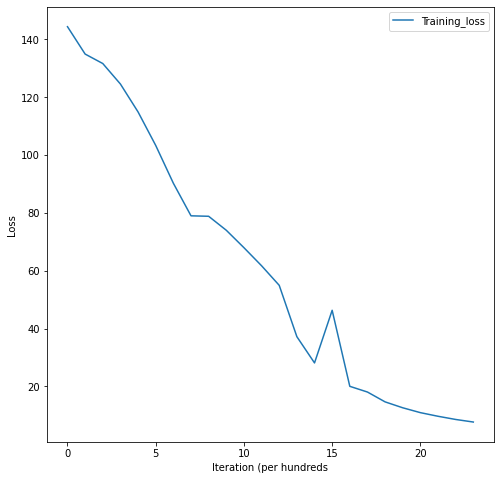

In [108]:
#call the Neural_Network class
neural = Neural_Network(0.0075, 2400)
network_parameters = neural.fit(X_train, y_train, layer_dim)

In [109]:
neural.predict(X_train, y_train, network_parameters)

Accuracy : 1.0


In [110]:
neural.predict(X_test, y_test, network_parameters)

Accuracy : 0.72
